**Assignment 4**
**CNN Analysis on Fashion MNIST Dataset:**
**Image Identification of Clothing Items**

Generated by Theodore Fitch

Department of Data Analytics, University of Maryland Global Campus

DATA 640: Predictive Modeling

Dr. Steven Knode: March 5th, Spring 2024


**Import libraries, import data, and explore data:**

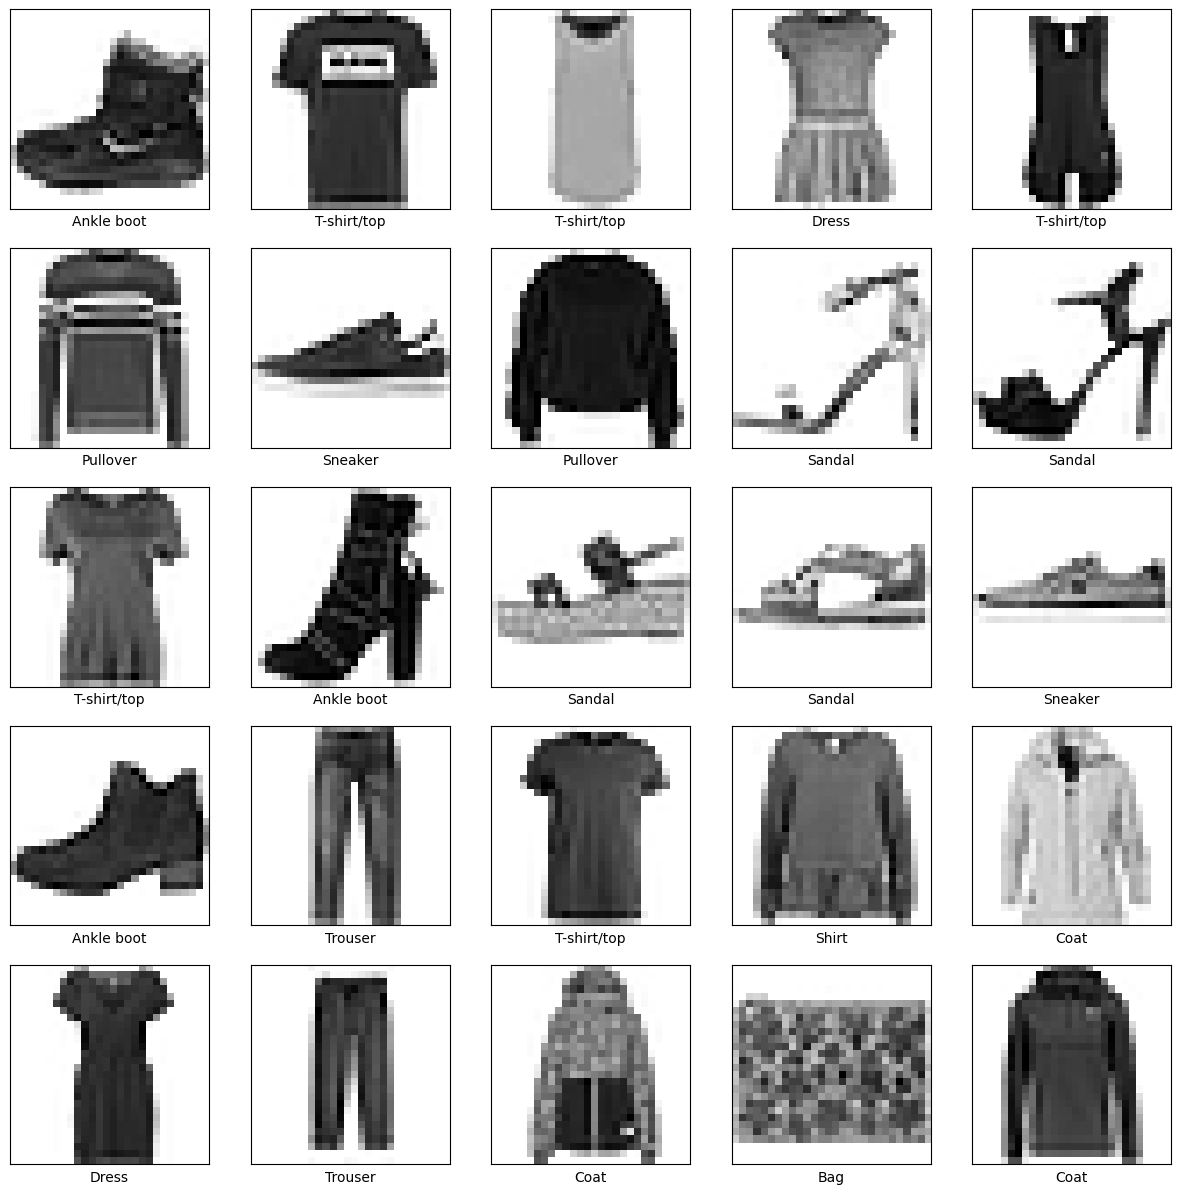

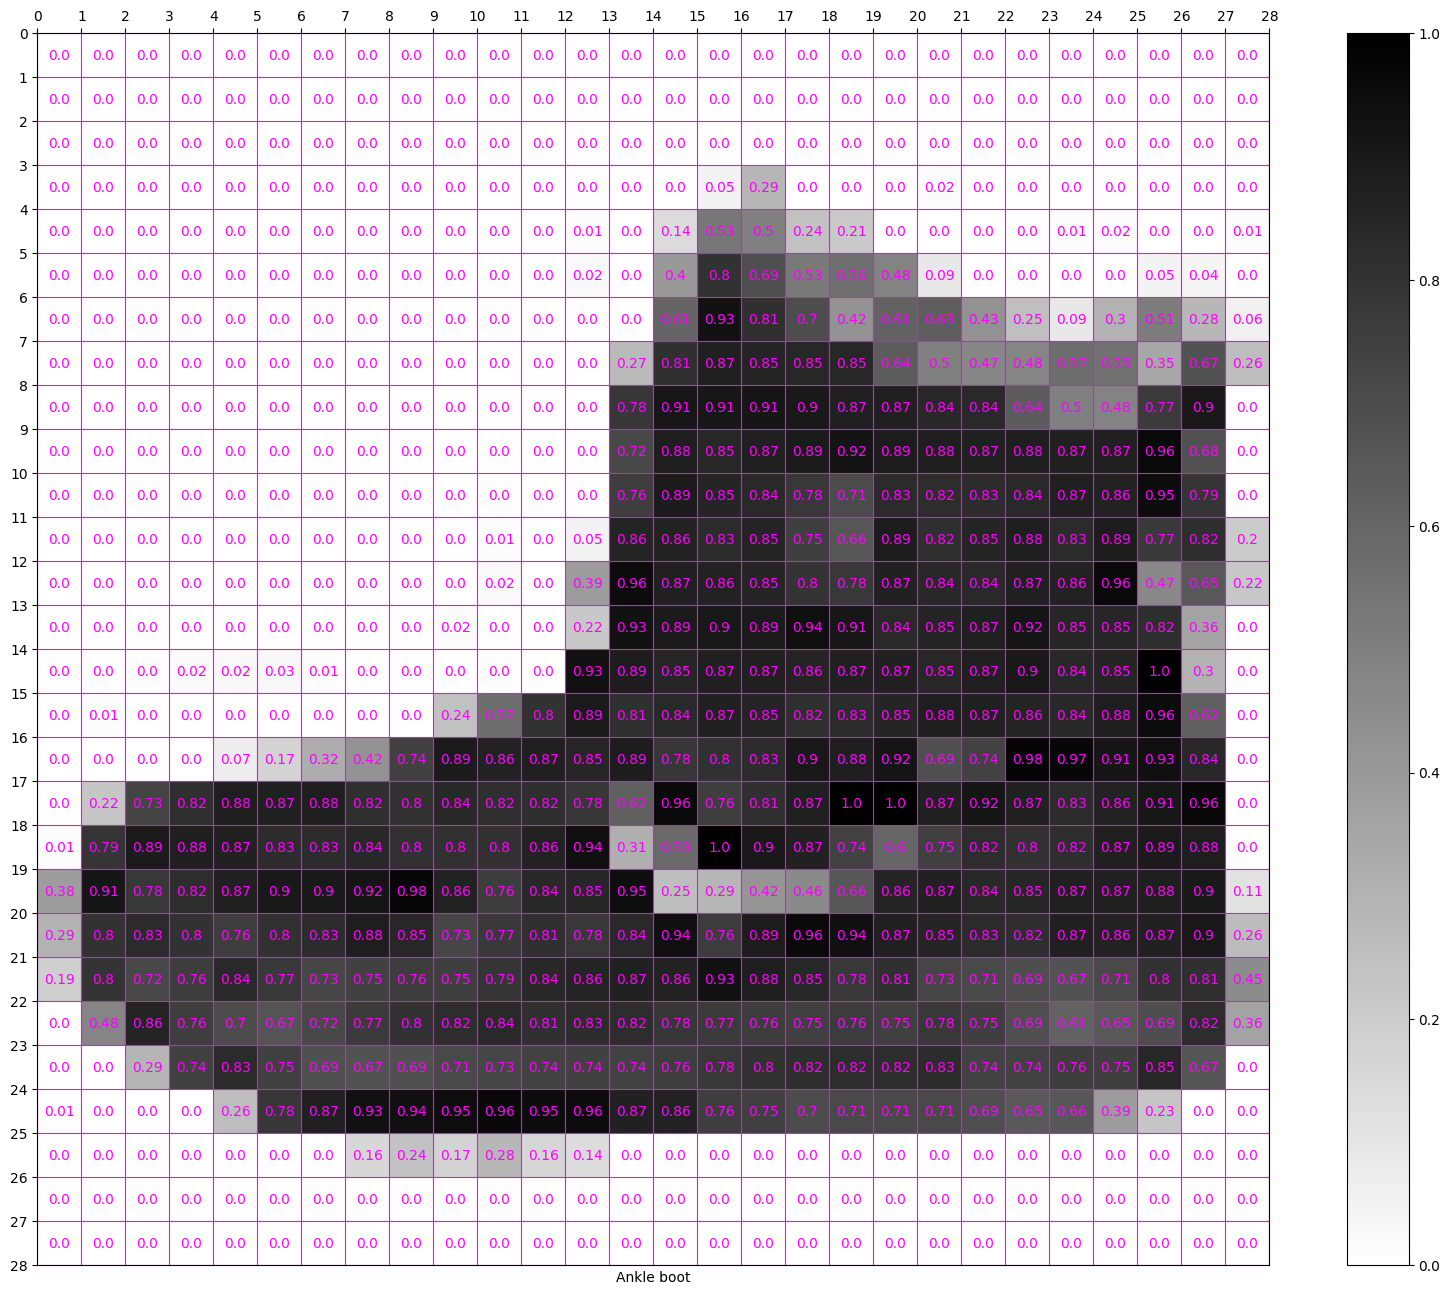

In [54]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Map for human readable class names (West, 2024)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Fetch "Fashion MNIST" data (West, 2024)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# A good rule of thumb is to normalise input values - i.e. transform them to a
# scale of 0 to 1. Each element in this dataset is a pixel value of 0 to 255, so
# we'll normalise / rescale these values (West, 2024)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Plot the first 25 images in the training dataset (West, 2024)
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Lets view the first image and classname in the dataset
# Tip: Change "index" value to view different images (West, 2024)
index = 0
plt.figure(figsize=(20,16))
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[index]])
plt.colorbar()
plt.grid(True)
plt.rc('grid', linestyle="-", color='fuchsia')

ax = plt.gca()
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.xaxis.tick_top()

# Adds Pixel Values on top of image (West, 2024)
for i in range(28):
    for j in range(28):
        text = ax.text(j, i, round(x_train[index][i, j], 2),
                       ha="center", va="center", color="fuchsia")


plt.show()



**Model 1**: Baseline model (West, 2024)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
predictions = model.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'True Positive Rate: {tpr * 100:.2f}%')
print(f'Specificity: {specificity * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


Epoch 1/10
750/750 [==============================] - 7s 7ms/step - loss: 0.5965 - accuracy: 0.7790 - val_loss: 0.3960 - val_accuracy: 0.8547
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3576 - accuracy: 0.8684 - val_loss: 0.3258 - val_accuracy: 0.8804
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2980 - accuracy: 0.8914 - val_loss: 0.2971 - val_accuracy: 0.8923
Epoch 4/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2649 - accuracy: 0.9027 - val_loss: 0.2684 - val_accuracy: 0.9021
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2403 - accuracy: 0.9125 - val_loss: 0.2801 - val_accuracy: 0.8947
Epoch 6/10
750/750 [==============================] - 3s 5ms/step - loss: 0.2204 - accuracy: 0.9177 - val_loss: 0.2627 - val_accuracy: 0.9070
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2035 - accuracy: 0.9261 - val_loss: 0.2976 - val_accuracy: 0.8988
Epoch 

**Model 2**: Model 1, adjusted for:


*   Increased convolutional filters from 64 to 128 in the third layer
*   Increased neurons in first dense layer from 64 to 128
*   Added a dropout layer of rate 0.5
*   Increased epochs from 10 to 15





In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Model2: Adjusted CNN model for increased accuracy
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))  # Increased filters
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))  # Increased neurons
model2.add(Dropout(0.5))  # Added dropout for regularization
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compile Model2
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model2
model2.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate Model2
predictions = model2.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model2): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model2): {tpr * 100:.2f}%')
print(f'Specificity (Model2): {specificity * 100:.2f}%')
print(f'Precision (Model2): {precision * 100:.2f}%')
print(f'F1 Score (Model2): {f1 * 100:.2f}%')

Epoch 1/15
750/750 [==============================] - 7s 5ms/step - loss: 0.7008 - accuracy: 0.7388 - val_loss: 0.4318 - val_accuracy: 0.8437
Epoch 2/15
750/750 [==============================] - 5s 6ms/step - loss: 0.4302 - accuracy: 0.8440 - val_loss: 0.3450 - val_accuracy: 0.8742
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3531 - accuracy: 0.8748 - val_loss: 0.3003 - val_accuracy: 0.8874
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3163 - accuracy: 0.8866 - val_loss: 0.2886 - val_accuracy: 0.8934
Epoch 5/15
750/750 [==============================] - 5s 6ms/step - loss: 0.2858 - accuracy: 0.8967 - val_loss: 0.2851 - val_accuracy: 0.8934
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2632 - accuracy: 0.9051 - val_loss: 0.2753 - val_accuracy: 0.8963
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2446 - accuracy: 0.9111 - val_loss: 0.2550 - val_accuracy: 0.9068
Epoch 

**Model 3**: Model 2, adjusted for:

*   Epochs increased to 50



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Model3: Adjusted CNN model for increased accuracy
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))  # Increased filters
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))  # Increased neurons
model3.add(Dropout(0.5))  # Added dropout for regularization
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# Compile Model3
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model3
model3.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate Model3
predictions = model3.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model3): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model3): {tpr * 100:.2f}%')
print(f'Specificity (Model3): {specificity * 100:.2f}%')
print(f'Precision (Model3): {precision * 100:.2f}%')
print(f'F1 Score (Model3): {f1 * 100:.2f}%')


Epoch 1/50
750/750 [==============================] - 7s 8ms/step - loss: 0.7119 - accuracy: 0.7351 - val_loss: 0.4310 - val_accuracy: 0.8413
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4331 - accuracy: 0.8428 - val_loss: 0.3475 - val_accuracy: 0.8703
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3567 - accuracy: 0.8729 - val_loss: 0.3219 - val_accuracy: 0.8848
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.3174 - accuracy: 0.8869 - val_loss: 0.3035 - val_accuracy: 0.8851
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2878 - accuracy: 0.8959 - val_loss: 0.2717 - val_accuracy: 0.8997
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.2640 - accuracy: 0.9028 - val_loss: 0.2852 - val_accuracy: 0.8957
Epoch 7/50
750/750 [==============================] - 5s 6ms/step - loss: 0.2436 - accuracy: 0.9121 - val_loss: 0.2670 - val_accuracy: 0.9030
Epoch 

**Model 4**: Model 2, adjusted for:


*   Batch normalization layers added after each convolutional layer
*   Increased neurons of first dense layer from 128 to 256
*   Dropout rate fine tuned to 0.4 and 0.3 after the first and second dense layers respectively


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Model4: Further Adjusted CNN model for increased accuracy
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(BatchNormalization())  # Added Batch Normalization
model4.add(AveragePooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(BatchNormalization())  # Added Batch Normalization
model4.add(AveragePooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(BatchNormalization())  # Added Batch Normalization
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))  # Increased neurons
model4.add(Dropout(0.4))  # Adjusted dropout rate
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))  # Adjusted dropout rate
model4.add(Dense(10, activation='softmax'))

# Compile Model4
model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model4
model4.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate Model4
predictions = model4.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model4): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model4): {tpr * 100:.2f}%')
print(f'Specificity (Model4): {specificity * 100:.2f}%')
print(f'Precision (Model4): {precision * 100:.2f}%')
print(f'F1 Score (Model4): {f1 * 100:.2f}%')


Epoch 1/15
750/750 [==============================] - 9s 7ms/step - loss: 0.5775 - accuracy: 0.7925 - val_loss: 0.3842 - val_accuracy: 0.8620
Epoch 2/15
750/750 [==============================] - 5s 6ms/step - loss: 0.3694 - accuracy: 0.8666 - val_loss: 0.3298 - val_accuracy: 0.8806
Epoch 3/15
750/750 [==============================] - 4s 6ms/step - loss: 0.3158 - accuracy: 0.8859 - val_loss: 0.3341 - val_accuracy: 0.8745
Epoch 4/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2814 - accuracy: 0.8985 - val_loss: 0.3013 - val_accuracy: 0.8912
Epoch 5/15
750/750 [==============================] - 5s 6ms/step - loss: 0.2588 - accuracy: 0.9059 - val_loss: 0.2738 - val_accuracy: 0.8969
Epoch 6/15
750/750 [==============================] - 5s 7ms/step - loss: 0.2444 - accuracy: 0.9122 - val_loss: 0.2860 - val_accuracy: 0.8988
Epoch 7/15
750/750 [==============================] - 5s 6ms/step - loss: 0.2205 - accuracy: 0.9199 - val_loss: 0.2656 - val_accuracy: 0.9043
Epoch 

**Model 5**: Model 4, adjusted for:


*   Data was augmented using "imagedatagenerator" by adjusting images (using zoom, shifts, shear, or rotation) so that the model trains more robustly
*   Increased epochs to 30


In [55]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Model5: Advanced CNN model with Data Augmentation
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dropout(0.4))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dropout(0.3))
model5.add(layers.Dense(10, activation='softmax'))

# Compile Model5
model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Data Augmentation and Training
history = model5.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=30,
    validation_data=(test_images, test_labels)
)

# Evaluate Model5
predictions = model5.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model5): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model5): {tpr * 100:.2f}%')
print(f'Specificity (Model5): {specificity * 100:.2f}%')
print(f'Precision (Model5): {precision * 100:.2f}%')
print(f'F1 Score (Model5): {f1 * 100:.2f}%')


Epoch 1/10
938/938 [==============================] - 26s 25ms/step - loss: 0.8633 - accuracy: 0.6837 - val_loss: 0.6161 - val_accuracy: 0.7763
Epoch 2/10
938/938 [==============================] - 24s 25ms/step - loss: 0.6313 - accuracy: 0.7692 - val_loss: 0.5017 - val_accuracy: 0.8130
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 0.5631 - accuracy: 0.7949 - val_loss: 0.5099 - val_accuracy: 0.8096
Epoch 4/10
938/938 [==============================] - 24s 25ms/step - loss: 0.5221 - accuracy: 0.8120 - val_loss: 0.4324 - val_accuracy: 0.8296
Epoch 5/10
938/938 [==============================] - 23s 25ms/step - loss: 0.4913 - accuracy: 0.8210 - val_loss: 0.4913 - val_accuracy: 0.8147
Epoch 6/10
938/938 [==============================] - 24s 25ms/step - loss: 0.4722 - accuracy: 0.8325 - val_loss: 0.4314 - val_accuracy: 0.8458
Epoch 7/10
938/938 [==============================] - 23s 25ms/step - loss: 0.4526 - accuracy: 0.8365 - val_loss: 0.4771 - val_accuracy:

**Model6**:

*   Decreased epochs to 10
*   Increased the number of filters in the convolutional layers
*   Increased the number of neurons in the dense layers
*   Used a leaning rate scheduler



In [39]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Learning Rate Scheduler
def lr_scheduler(epoch):
    return 1e-3 * 0.9 ** epoch

lr_callback = LearningRateScheduler(lr_scheduler)

# Model6: Improved CNN model with Data Augmentation, Batch Normalization, and Learning Rate Scheduler
model6 = models.Sequential()
model6.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(256, (3, 3), activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(256, activation='relu'))
model6.add(layers.Dropout(0.3))
model6.add(layers.Dense(10, activation='softmax'))

# Compile Model6
model6.compile(optimizer=Adam(learning_rate=1e-3),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Data Augmentation and Training
history = model6.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[lr_callback]
)

# Evaluate Model6
predictions = model6.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model6): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model6): {tpr * 100:.2f}%')
print(f'Specificity (Model6): {specificity * 100:.2f}%')
print(f'Precision (Model6): {precision * 100:.2f}%')
print(f'F1 Score (Model6): {f1 * 100:.2f}%')


Epoch 1/10
938/938 [==============================] - 32s 27ms/step - loss: 0.8584 - accuracy: 0.6888 - val_loss: 0.6814 - val_accuracy: 0.7629 - lr: 0.0010
Epoch 2/10
938/938 [==============================] - 25s 27ms/step - loss: 0.5979 - accuracy: 0.7794 - val_loss: 0.5431 - val_accuracy: 0.7873 - lr: 9.0000e-04
Epoch 3/10
938/938 [==============================] - 25s 27ms/step - loss: 0.5342 - accuracy: 0.8070 - val_loss: 0.5457 - val_accuracy: 0.7942 - lr: 8.1000e-04
Epoch 4/10
938/938 [==============================] - 24s 26ms/step - loss: 0.4896 - accuracy: 0.8217 - val_loss: 0.4078 - val_accuracy: 0.8570 - lr: 7.2900e-04
Epoch 5/10
938/938 [==============================] - 25s 26ms/step - loss: 0.4564 - accuracy: 0.8346 - val_loss: 0.3842 - val_accuracy: 0.8591 - lr: 6.5610e-04
Epoch 6/10
938/938 [==============================] - 34s 36ms/step - loss: 0.4317 - accuracy: 0.8444 - val_loss: 0.4474 - val_accuracy: 0.8362 - lr: 5.9049e-04
Epoch 7/10
938/938 [==================

**Model 7**: Model 2 with increased dense layer neurons, and increased filters

In [62]:
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have train_labels, test_labels, train_images, and test_images

# Model7: Adjusted CNN model from Model 2, increased batch size and dense layer neurons
model7 = models.Sequential()
model7.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Increased filters
model7.add(layers.Flatten())
model7.add(layers.Dense(256, activation='relu'))  # Increased neurons
model7.add(layers.Dropout(0.2))  # Added dropout for regularization
model7.add(layers.Dense(128, activation='relu'))
model7.add(layers.Dense(10, activation='softmax'))

# Compile Model7
model7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train Model7
model7.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate Model7
predictions = model7.predict(test_images)
predicted_labels = [np.argmax(prediction) for prediction in predictions]
true_labels = [np.argmax(label) for label in test_labels]

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
tpr = recall_score(true_labels, predicted_labels, average='macro')  # True Positive Rate
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])  # Specificity
precision = precision_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model7): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model7): {tpr * 100:.2f}%')
print(f'Specificity (Model7): {specificity * 100:.2f}%')
print(f'Precision (Model7): {precision * 100:.2f}%')
print(f'F1 Score (Model7): {f1 * 100:.2f}%')


Epoch 1/10
375/375 [==============================] - 6s 9ms/step - loss: 0.6430 - accuracy: 0.7600 - val_loss: 0.3938 - val_accuracy: 0.8562
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3472 - accuracy: 0.8725 - val_loss: 0.3563 - val_accuracy: 0.8687
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2864 - accuracy: 0.8946 - val_loss: 0.2848 - val_accuracy: 0.8978
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2509 - accuracy: 0.9076 - val_loss: 0.2570 - val_accuracy: 0.9041
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2213 - accuracy: 0.9198 - val_loss: 0.2538 - val_accuracy: 0.9093
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1943 - accuracy: 0.9280 - val_loss: 0.2517 - val_accuracy: 0.9097
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1733 - accuracy: 0.9351 - val_loss: 0.2510 - val_accuracy: 0.9133
Epoch 

**Final Model**: Model 8, based upon the TensorFlow (2024)

In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have train_labels, test_labels, train_images, and test_images

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

# Model8: Modified TensorFlow (2024) model with additional metrics and validation split
model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

model8.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

# Train Model8 with validation split
model8.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

# Evaluate Model8
predictions = model8.predict(test_images)
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

# Calculate metrics
conf_matrix = confusion_matrix(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)
tpr = recall_score(test_labels, predicted_labels, average='macro')
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
precision = precision_score(test_labels, predicted_labels, average='macro')
f1 = f1_score(test_labels, predicted_labels, average='macro')

# Print metrics
print(f'Test Accuracy (Model8): {accuracy * 100:.2f}%')
print(f'True Positive Rate (Model8): {tpr * 100:.2f}%')
print(f'Specificity (Model8): {specificity * 100:.2f}%')
print(f'Precision (Model8): {precision * 100:.2f}%')
print(f'F1 Score (Model8): {f1 * 100:.2f}%')


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/15
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5060 - accuracy: 0.8202 - val_loss: 0.4321 - val_accuracy: 0.8424
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3783 - accuracy: 0.8619 - val_loss: 0.3850 - val_accuracy: 0.8554
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3369 - accuracy: 0.8764 - val_loss: 0.3569 - val_accuracy: 0.8708
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8848 - val_loss: 0.3397 - val_accuracy: 0.8755
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2934 - accuracy: 0.8910 - val_loss: 0.3239 - val_accuracy: 0.8823
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2757 - accuracy: 0.8984 - val_loss: 0.3259 - val_accuracy: 0.8812
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - los

**Print plot for first entry, and first 25 entries of model8**

313/313 [==============================] - 1s 3ms/step


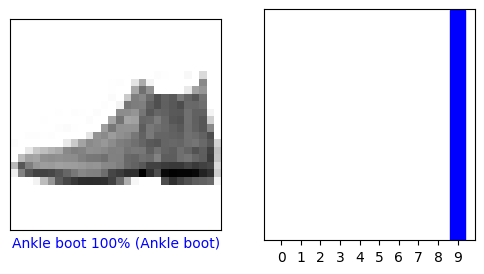

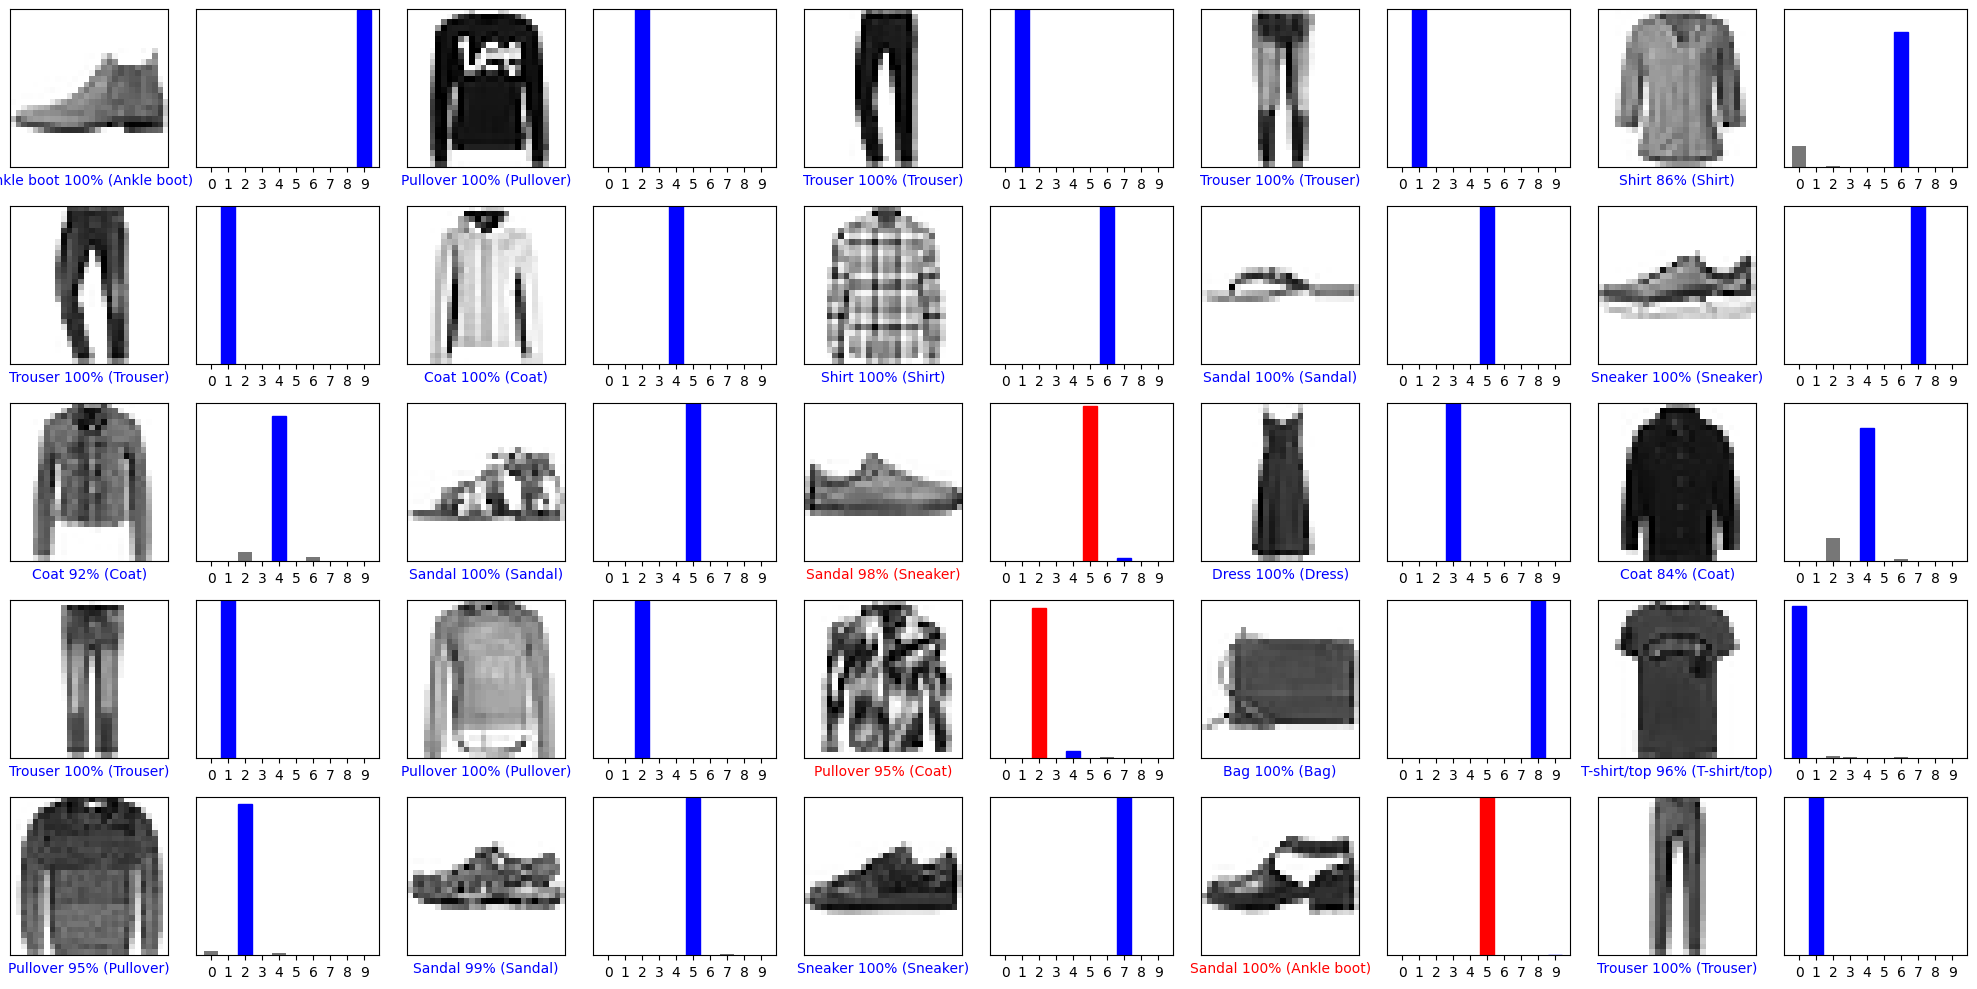

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
# Prepare predictions
temperature = 0.5
probability_model = tf.keras.Sequential([model8,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


# Prepare Plots
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot of first image only
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Print plot for first 25 incorrectly categorized entries from test dataset of model8**

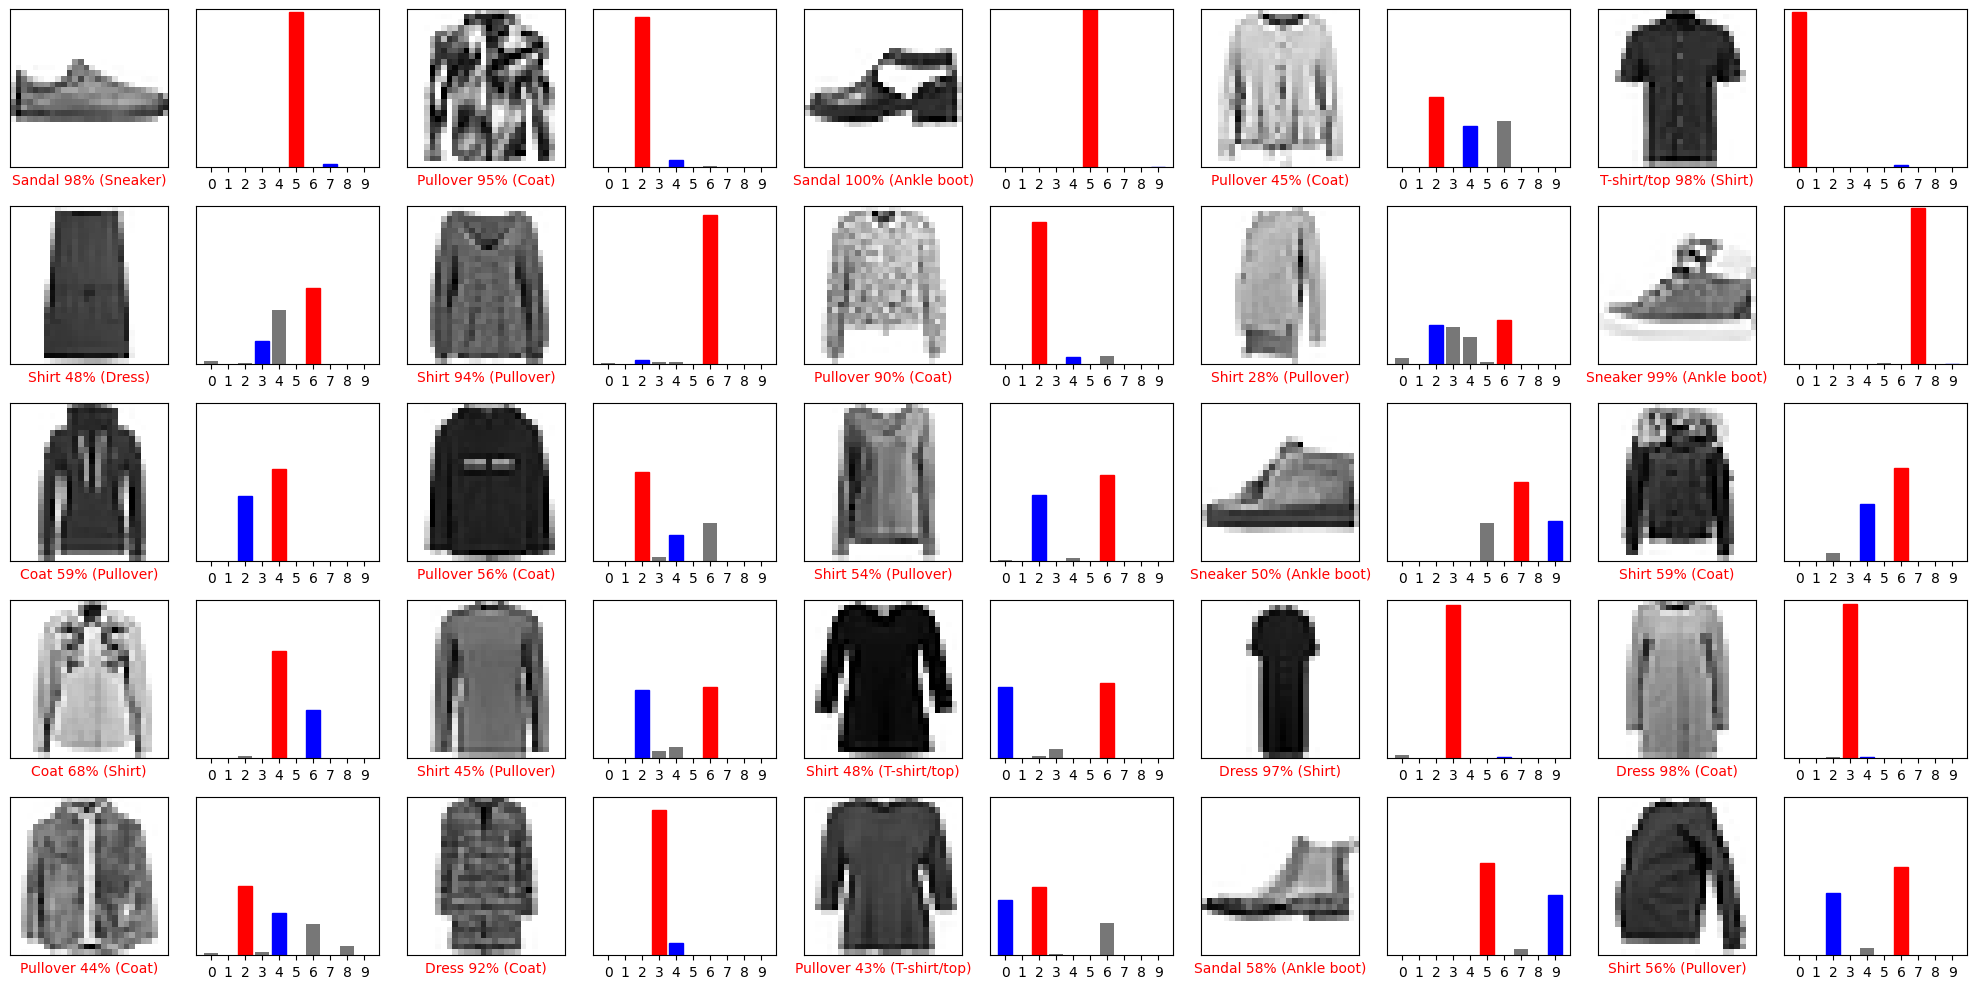

In [6]:
# Prepare table
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
incorrect_indices = []

# Identify indices of incorrect predictions
for i in range(len(predictions)):
    if np.argmax(predictions[i]) != test_labels[i]:
        incorrect_indices.append(i)

# Plot the first 25 incorrect predictions
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    idx = incorrect_indices[i]
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(idx, predictions[idx], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(idx, predictions[idx], test_labels)
plt.tight_layout()
plt.show()

**Confusion Matrix of Model 8**

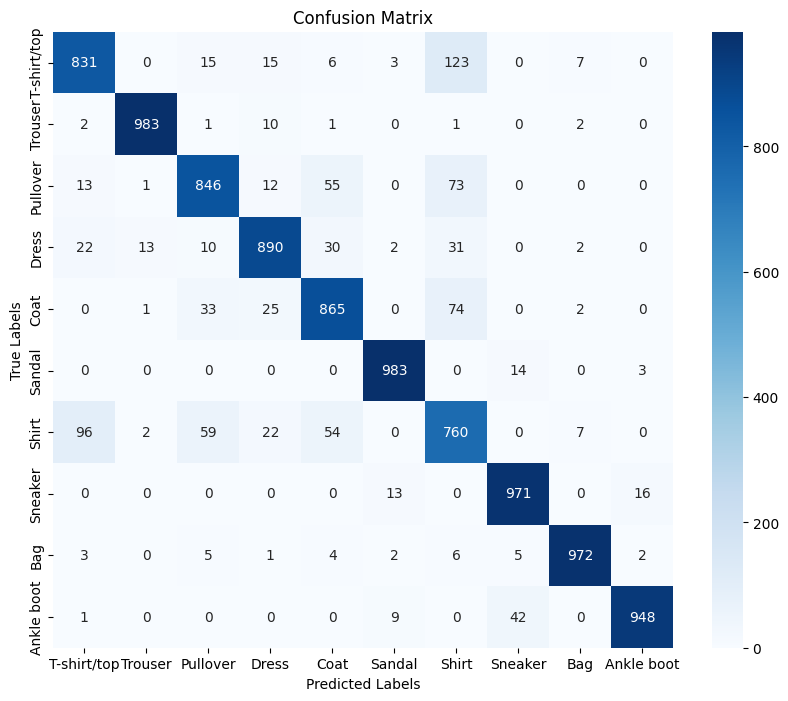


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.85      0.86      0.86      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.71      0.76      0.74      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000



In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'predictions' contains the predicted class labels (use np.argmax if needed)
predicted_labels = np.argmax(predictions, axis=1)

# Assuming 'test_labels' contains the true class labels
true_labels = test_labels

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=np.arange(10))

# Print the confusion matrix with labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more detailed metrics
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)


**Confusion Matrix of Model 7**

313/313 [==============================] - 1s 2ms/step


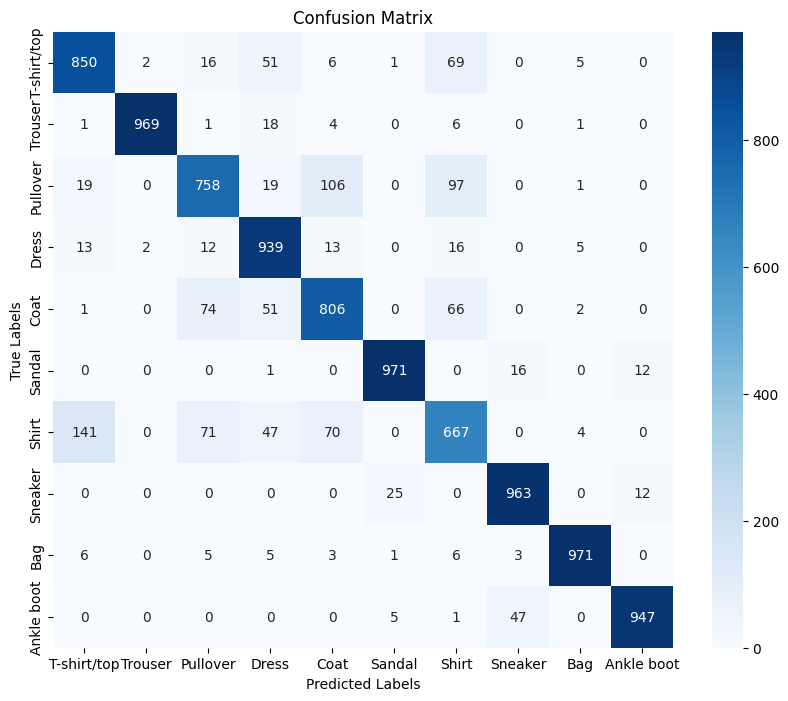


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.81      0.76      0.78      1000
       Dress       0.83      0.94      0.88      1000
        Coat       0.80      0.81      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [7]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prepare predictions
temperature = 0.5
probability_model = tf.keras.Sequential([model8,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)



# Assuming 'predictions' contains the predicted class labels (use np.argmax if needed)
predicted_labels = np.argmax(predictions, axis=1)

# Assuming 'test_labels' contains the true class labels
true_labels = test_labels

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=np.arange(10))

# Print the confusion matrix with labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more detailed metrics
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)
